Karthik Konath (kk28699), Kyle Polansky (kpp446)

# <center>EE 379K-DS Lab 4<center>

# Problem 1: PCA

##### 1.1 Generate 20 random points in d = 3 ... Create a 3D plot of the clouds of data points labeled with the two labels.

In [6]:
import numpy as np
mean=[0,0,0]
cov=[[0.5,0,0],[0,0.5,0],[0,0,0.7]]
rp1 = np.random.multivariate_normal(mean,cov,20)
print rp1

mean=[1,1,1]
cov=[[0.5,0,0],[0,0.5,0],[0,0,0.01]]
rp2 = np.random.multivariate_normal(mean,cov,20)
print rp2


[[ 0.55971357  0.54661129  0.40357255]
 [ 0.73948607 -0.88203893  0.04081321]
 [ 0.17991807 -1.08045792 -1.63651756]
 [-0.76984987 -0.05104065  0.40585639]
 [ 0.09327709 -1.33302742 -0.14625055]
 [ 0.19461201 -0.36448267 -0.18633656]
 [-0.19284089  0.98405778  0.47563596]
 [ 0.25566131  0.42505222 -0.92331476]
 [ 0.44435204 -0.07326824 -0.58398408]
 [-1.03054676 -1.39636747  0.90383732]
 [ 0.43525905  1.11095997 -0.75858576]
 [-0.33404393 -0.74282722 -0.17962995]
 [-0.23531901  0.13047153 -0.18341635]
 [ 0.06325663 -1.2012725  -0.72744424]
 [-0.08942517 -0.25735423 -1.2566234 ]
 [ 0.55161248  0.2642889   0.37745651]
 [ 0.53214998  0.59311219  1.2143878 ]
 [ 0.94177928  0.36492951 -1.74645194]
 [ 0.79281389 -0.90258213  0.19880742]
 [-0.78468053 -0.82025258 -0.68288561]]
[[ 1.91693257  0.7986816   1.12221177]
 [ 2.4743164   0.67295193  1.08029492]
 [ 0.98526811  1.70236023  0.90436606]
 [ 0.66119166  0.19108517  1.0570374 ]
 [ 0.54511456  1.59578419  1.2470666 ]
 [ 0.88417549  1.7655179

##### 1.2 What do the points look like?

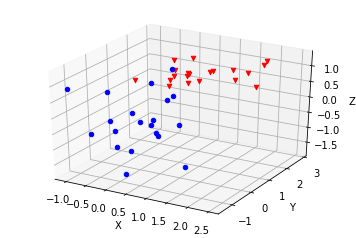

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
n=0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
while(n<len(rp1)):
    ax.scatter(rp1[n][0],rp1[n][1],rp1[n][2],c='b',marker='o')
    ax.scatter(rp2[n][0],rp2[n][1],rp2[n][2],c='r',marker='v')
    n+=1
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

##### 1.3 Concatenate all the points and ignore the labels. Find the covariance of this dataset.

In [8]:
rp = np.concatenate([rp1,rp2])
#Manually calculate mean
rpSum = np.sum(rp, axis=0)
rpMean = np.divide(rpSum,rp.shape[0])

#Manually calculate covariance matrix
rpdiff = np.subtract(rp,rpMean)
rpdiffmultxy = np.multiply(rpdiff[:,0],rpdiff[:,1])
rpdiffmultsumxy = np.sum(rpdiffmultxy)
rpdiffmultyz = np.multiply(rpdiff[:,1],rpdiff[:,2])
rpdiffmultsumyz = np.sum(rpdiffmultyz)
rpdiffmultxz = np.multiply(rpdiff[:,0],rpdiff[:,2])
rpdiffmultsumxz = np.sum(rpdiffmultxz)
covarxy = np.divide(rpdiffmultsumxy,rp.shape[0]-1)
covaryz = np.divide(rpdiffmultsumyz,rp.shape[0]-1)
covarxz = np.divide(rpdiffmultsumxz,rp.shape[0]-1)
varx = np.divide(np.sum(np.square(rp[:,0]-rpMean[0])),rp.shape[0]-1)
vary = np.divide(np.sum(np.square(rp[:,1]-rpMean[1])),rp.shape[0]-1)
varz = np.divide(np.sum(np.square(rp[:,2]-rpMean[2])),rp.shape[0]-1)
COV = [[varx,covarxy,covarxz],[covarxy,vary,covaryz],[covarxz,covaryz,varz]]
print("COV: ", COV)
print("Real Cov", np.cov(rp,rowvar=False))


('COV: ', [[0.58500362444968368, 0.46242701902825234, 0.26034999285248789], [0.46242701902825234, 1.0767092153646178, 0.47668255104907714], [0.26034999285248789, 0.47668255104907714, 0.71337521801436299]])
('Real Cov', array([[ 0.58500362,  0.46242702,  0.26034999],
       [ 0.46242702,  1.07670922,  0.47668255],
       [ 0.26034999,  0.47668255,  0.71337522]]))


##### 1.4 Find the two eigenvectors of the covariance matrix with the largest eigenvalues. Project the data points on these two vectors and show the two dimensional plot with the clouds of points. Also show the labels of the points. Did PCA make it easier to distinguish the two labels in two dimensions?

In [25]:
w,v = np.linalg.eig(COV);
print ("Eigenvalues: ", w)
print ("Eigenvectors: ",v)
min = 0
if(w[1]<w[min]):
    min=1
if(w[2]<w[min]):
    min=2
w = np.delete(w,min)
v= np.delete(v,min,0)
print "Max Eigenvalues: " , str(w[0]) , str(w[1])
print "Corresponding Eigenvectors: ", v

('Eigenvalues: ', array([ 1.66437815,  0.3032901 ,  0.4074198 ]))
('Eigenvectors: ', array([[-0.44028668, -0.79661675, -0.41418522],
       [-0.74858172,  0.58040456, -0.32055569],
       [-0.49575502, -0.16891509,  0.85187713]]))
Max Eigenvalues:  1.66437815347 0.407419802524
Corresponding Eigenvectors:  [[-0.44028668 -0.79661675 -0.41418522]
 [-0.49575502 -0.16891509  0.85187713]]


# Problem 2: Low rank approximation of Mona Lisa

##### 2.1 Load the Mona Lisa image (in grayscale) and treat it as a matrix M. Perform a singular valuedecomposition on this matrix usinglinalg.svd.  You can perform a low-rank approximationby zeroing out singular values and keeping only the top $k$.  Show the best rank $k$= 2, $k$= 5 and $k$= 10 approximation to Mona Lisa.

##### 2.2 If each pixel is represented by two bytes, how many bits is your compressed Mona Lisa foreach of thosekrank approximations?

# Problem 3: Using Low Rank Structure for Corrupted Entries

##### Download filesCorrMat1.csv and CorrMat3.csv from Canvas. These are each 100 by 100 matrices. Look at the data and find which entries are corrupted. Then try to correct these corrupted entries. Explain  your  approach.  (Hint:  The  corrupted  entries  have  values  that  are  completely out of the range of the others. This should help you identify which are the corrupted ones.  For completing them, the hint is that we have been talking about PCA, low rank matrices and low-rankapproximations.)

In [49]:
import heapq
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
CM1 = open("CorrMat1.csv", 'r')
CM3 = open("CorrMat3.csv", 'r')
df1 = pd.read_csv(CM1, sep = ',', header = None)
df3 = pd.read_csv(CM3, sep = ',', header = None)
df1f = pca.fit(df1)

#w,v = np.linalg.eig(df1.cov())
#print "The indexes for the eigenvectors are: ",np.argpartition(w, -2)[-2:]
#w,v = np.linalg.eig(df3.cov())
#print "The indexes for the eigenvectors are: ",np.argpartition(w, -2)[-2:]



# Problem 4: Getting more into Kaggle

##### 4.2 Train a ridge regression and a lasso regression model.  Optimize the alphas using cross validation.  What is the best score you can get from a single ridge regression model and from asingle lasso model?

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

all_data = pd.get_dummies(all_data)

#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [28]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

5.00     0.127822
6.00     0.127613
7.00     0.127479
8.00     0.127396
9.00     0.127352
9.25     0.127346
9.50     0.127341
9.75     0.127339
10.00    0.127337
10.10    0.127337
10.20    0.127337
10.30    0.127338
10.40    0.127338
10.50    0.127339
10.75    0.127342
11.00    0.127346
12.00    0.127372
13.00    0.127413
14.00    0.127466
15.00    0.127529
dtype: float64
Ridge min error: 0.12733723279715922


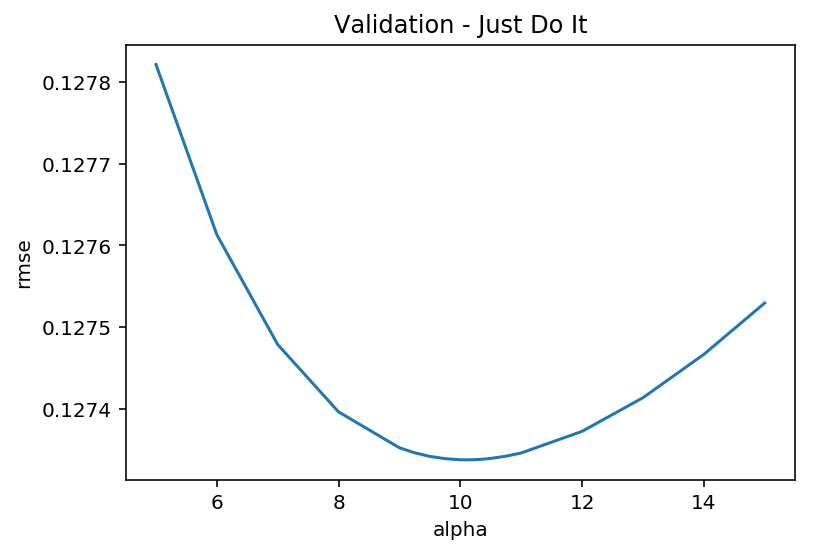

In [5]:
#Ridge
model_ridge = Ridge()

alphas = [5, 6, 7, 8, 9, 9.25, 9.5, 9.75, 10, 10.1, 10.2, 10.3, 10.4, 10.5, 10.75, 11, 12, 13, 14, 15]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)

cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

print(cv_ridge)
print("Ridge min error: %s" % str(cv_ridge.min()))

In [6]:
model_ridge = Ridge(alpha = 10.1).fit(X_train, y)
print("Ridge min error: %s" % str(rmse_cv(model_ridge).mean()))
ridge_coef = pd.Series(model_ridge.coef_, index = X_train.columns)

Ridge min error: 0.12733723279715922


In [7]:
#Lasso
model_lasso = LassoCV(alphas = [0.1, 0.01, 0.005, 0.001, 0.0005]).fit(X_train, y)

print("Lasso min error: %s" % str(rmse_cv(model_lasso).mean()))

Lasso min error: 0.12314421090977441


##### 4.3 Plot the $l_0$ norm (number of nonzeros) of the coefficients that lasso produces as you vary alpha.

In [8]:
lasso_coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print(lasso_coef)
print("Lasso non-zero coefficients: %s" % sum(lasso_coef != 0))

MSSubClass              -0.007480
LotFrontage              0.000000
LotArea                  0.071826
OverallQual              0.053160
OverallCond              0.043027
YearBuilt                0.001777
YearRemodAdd             0.000722
MasVnrArea              -0.000194
BsmtFinSF1               0.009292
BsmtFinSF2              -0.001385
BsmtUnfSF               -0.003975
TotalBsmtSF              0.019208
1stFlrSF                 0.030350
2ndFlrSF                -0.003396
LowQualFinSF            -0.003880
GrLivArea                0.400009
BsmtFullBath             0.025674
BsmtHalfBath             0.000000
FullBath                 0.021307
HalfBath                 0.013793
BedroomAbvGr            -0.001004
KitchenAbvGr            -0.009937
TotRmsAbvGrd             0.005079
Fireplaces               0.022117
GarageYrBlt              0.000029
GarageCars               0.038789
GarageArea               0.000051
WoodDeckSF               0.004409
OpenPorchSF              0.001631
EnclosedPorch 

##### 4.4 Add the outputs of your models as features and train a ridge regression on all the features plus the model outputs (This is called Ensembling and Stacking). Be careful not to overfit. What score can you get?

In [9]:
cols = X_train.columns.values
feature_dataframe = pd.DataFrame({'Ridge': ridge_coef, 'Lasso': lasso_coef})

In [38]:
print(feature_dataframe)

                          Lasso     Ridge
MSSubClass            -0.007480 -0.012809
LotFrontage            0.000000 -0.001896
LotArea                0.071826  0.075529
OverallQual            0.053160  0.052296
OverallCond            0.043027  0.039278
YearBuilt              0.001777  0.001311
YearRemodAdd           0.000722  0.000696
MasVnrArea            -0.000194 -0.001044
BsmtFinSF1             0.009292  0.010452
BsmtFinSF2            -0.001385 -0.002433
BsmtUnfSF             -0.003975 -0.004552
TotalBsmtSF            0.019208  0.030520
1stFlrSF               0.030350  0.122219
2ndFlrSF              -0.003396  0.007740
LowQualFinSF          -0.003880  0.000195
GrLivArea              0.400009  0.205824
BsmtFullBath           0.025674  0.025758
BsmtHalfBath           0.000000  0.001273
FullBath               0.021307  0.036846
HalfBath               0.013793  0.026862
BedroomAbvGr          -0.001004  0.004908
KitchenAbvGr          -0.009937 -0.033588
TotRmsAbvGrd           0.005079  0

In [39]:
from mlxtend.classifier import StackingClassifier
stacking_classifier = LinearRegression()
model_stacked = StackingClassifier(classifiers=[model_lasso, model_ridge],
                                   meta_classifier=stacking_classifier).fit(X_train, y)

print("Stacked min error: %s" % rmse_cv(model_xgb).mean())

Stacked min error: 0.12380131448881475


##### 4.5 Install XGBoost (Gradient Boosting) and train a gradient boosting regression. What score can you get just from a single XGB? (you will need to optimize over its parameters).

c:\users\kyle\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.12553933333333334


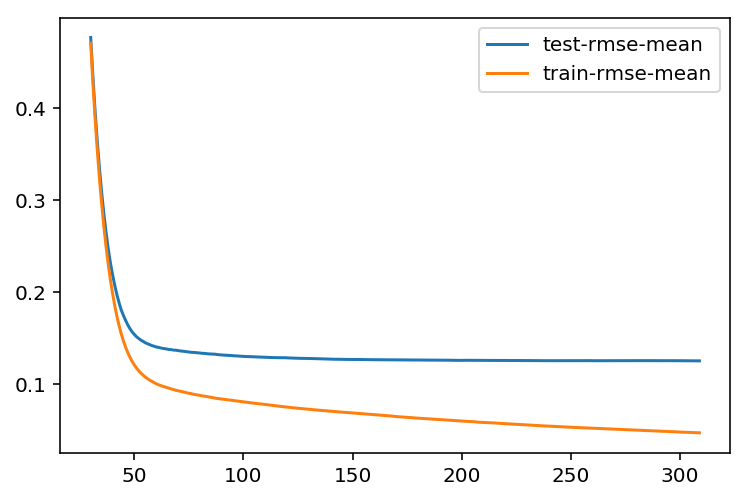

In [11]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":3, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=1000, early_stopping_rounds=100)
np.set_printoptions(threshold=np.nan)
print(model["test-rmse-mean"].min())
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [12]:
model_xgb = xgb.XGBRegressor(n_estimators=1000, max_depth=3, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

rmse_cv(model_xgb).mean()

0.12380131448881475

##### 4.9 You will be graded based on your public score (include that in your report) and also on the creativity of your solution. In your report (that you will submit as a pdf file), explain what worked and what did not work.

In [42]:
stacked_preds = np.expm1(model_stacked.predict(X_test))
solution = pd.DataFrame({"id":test.Id, "SalePrice":stacked_preds})
solution.to_csv("stacked_sol.csv", index = False)

Things that didn't work: stacking with the XGBoost model, using a non-linear stacking classifier.
What we found to work: stacking simple models with the linear classifier.

Our final Kaggle score was: 0.12067